In [24]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
dataset = '/home/sergei/data/change_org_petitions_Amber_Heard_at_20211005-222550_limit_1000_offset_0_delay_ms_500.csv'

In [6]:
df = pd.read_csv(dataset)
df

,_index,_type,_id,_score,_source__total_signature_count,_source__created_locale,_source__first_name,_source__weekly_signature_count,_source__recent_activity_date,_source__is_pledge,...,petition__organization__photo_id,petition__photo,petition__restricted_location__city,petition__restricted_location__country_code,petition__restricted_location__lat,petition__restricted_location__lng,petition__restricted_location__state_code,petition__restricted_location__google_places_id,petition__restricted_location__photo_id,petition__missingPetition
0,petitions-en,petitions,20569720::Amber Heard,7.115500,23844,en-US,Linda,324,2020-03-01T07:41:24Z,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,petitions-en,petitions,26062476::Amber Heard,6.871536,13594,en-US,Kasandra,77,2021-01-14T22:55:30Z,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,petitions-en,petitions,25704328::Amber Heard,6.744285,34486,es-419,Alexis,116,2020-11-07T02:37:54Z,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,petitions-en,petitions,25752458::Amber Heard,6.438685,38987,en-US,Dominic,31,2021-05-15T19:11:39Z,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,petitions-en,petitions,13641580::Amber Heard,6.325689,11460,ru-RU,Ksu,5,2019-11-16T18:31:44Z,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,petitions-en,petitions,4373742::Amber Heard,0.669221,5,en-US,Michael S,0,2015-09-28T21:04:19Z,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,petitions-en,petitions,23141324::Amber Heard,0.633609,12,en-US,Hunter,0,2020-06-28T21:44:07Z,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
290,petitions-en,petitions,13269107::Amber Heard,0.567439,6,en-GB,Tom,0,2018-06-09T01:51:59Z,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291,petitions-en,petitions,13392951,0.507148,8,en-US,Crystal,0,2018-07-19T22:06:26Z,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [7]:
# removing columns with ==1 entry
col_unique_vals = {col: len(set(df[col])) for col in df.columns}
for col, vals in col_unique_vals.items():
    if vals <= 1:
        print("dropping", col)
        del df[col]

dropping _index
dropping _type
dropping _source__is_pledge
dropping _source__discoverable


In [9]:
list(df.columns)

['_id',
 '_score',
 '_source__total_signature_count',
 '_source__created_locale',
 '_source__first_name',
 '_source__weekly_signature_count',
 '_source__recent_activity_date',
 '_source__targeting_description',
 '_source__created_at',
 '_source__user_id',
 '_source__victory',
 '_source__victory_date',
 '_source__status',
 '_source__user_city',
 '_source__user_photo_id',
 '_source__tag_objects',
 '_source__coachable',
 '_source__sponsored_campaign',
 '_source__tag_names',
 '_source__country_code',
 '_source__user_state',
 '_source__sponsorship_active',
 '_source__relevant_location',
 '_source__movement_ids',
 '_source__petition_id',
 '_source__last_name',
 '_source__slug',
 '_source__petition_photo_id',
 '_source__ask',
 'highlight__letter_body',
 'highlight__description',
 'highlight__ask',
 'petition__id',
 'petition__document_id',
 'petition__ask',
 'petition__created_at',
 'petition__deleted_at',
 'petition__published_at',
 'petition__last_edited_at',
 'petition__original_locale',
 

In [15]:
df['petition__created_at'] = pd.to_datetime(df.petition__created_at)

In [19]:
str(df['petition__created_at'].iloc[-1])

'NaT'

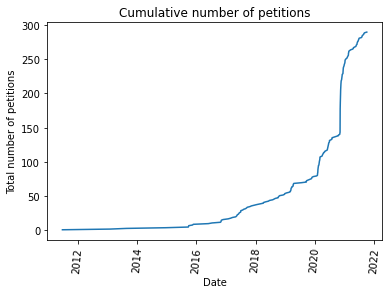

In [23]:
plt.title("Cumulative number of petitions")
plt.xlabel("Date")
plt.ylabel("Total number of petitions")
created_at = sorted(filter(lambda x: str(x) != 'NaT', df.petition__created_at))
plt.plot(created_at, list(range(len(created_at))))
plt.xticks(rotation=85)
plt.savefig('figures/petitions_created.png', bbox_inches='tight', transparent=False)
plt.show()

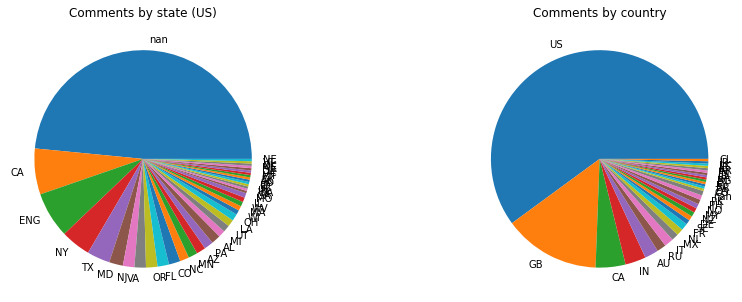

In [26]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Comments by state (US)")
states, freqs = zip(*Counter(df.petition__user__state_code).most_common())
plt.pie(freqs, labels=states)

plt.subplot(1, 2, 2)
plt.title("Comments by country")
states, freqs = zip(*Counter(df.petition__user__country_code).most_common())
plt.pie(freqs, labels=states)

plt.savefig('./figures/petitions-state-country-pie.png', transparent=False,
            bbox_inches='tight')

plt.show()